In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('water_potability.csv')

In [36]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [54]:
df = df.dropna()
df = df.rename(columns={'Organic_carbon': 'Organic Carbon'})
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic Carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


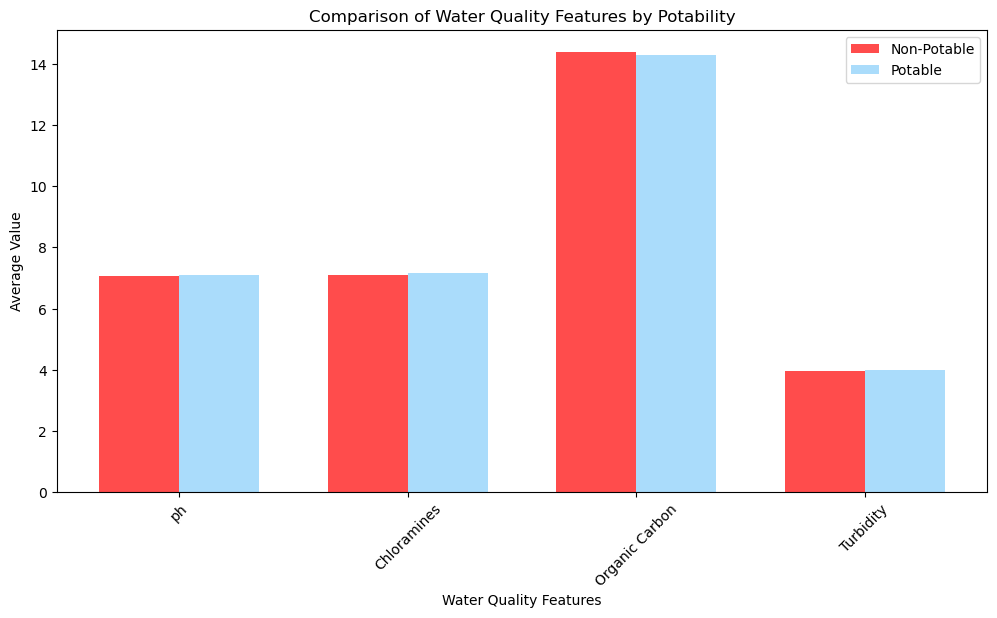

In [55]:
features = ["ph","Chloramines","Organic Carbon", "Turbidity"]

grouped_means = df.groupby("Potability")[features].mean()

x = np.arange(len(features))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, grouped_means.loc[0], width, label="Non-Potable", color="red", alpha=0.7)
bars2 = ax.bar(x + width/2, grouped_means.loc[1], width, label="Potable", color="lightskyblue", alpha=0.7)


ax.set_xlabel("Water Quality Features")
ax.set_ylabel("Average Value")
ax.set_title("Comparison of Water Quality Features by Potability")
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45)
ax.legend()
plt.show()